In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
#Data Collection and preparation

In [ ]:
# !pip install kaggle
# from google.colab import files
# files.upload()

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle datasets download -d pranavraikokte/covid19-image-dataset

In [ ]:
# import zipfile

# zip_path = '/content/covid19-image-dataset.zip'

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall('/content/')

In [ ]:
import os
from pathlib import Path

!ls /content

data_path = Path("/content/Covid19-dataset")

 Covid19-dataset   covid19-image-dataset.zip  'kaggle (1).json'   kaggle.json   sample_data


In [ ]:
train_dir = data_path / "train"
test_dir = data_path / "test"

Size of Image 1272 x 1645
Image Path /content/Covid19-dataset/train/Covid/079.jpeg
Image Class :  Covid


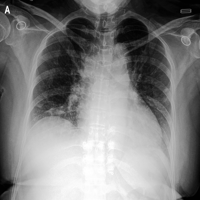

In [ ]:
import random
from PIL import Image

extracted_dir = Path('/content/Covid19-dataset')

image_path_list = list(extracted_dir.glob("*/*/*.jpeg"))
random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Size of Image {img.height} x {img.width}")
print(f"Image Path {random_image_path}")
print(f"Image Class :  {image_class}")
img.resize((200, 200))

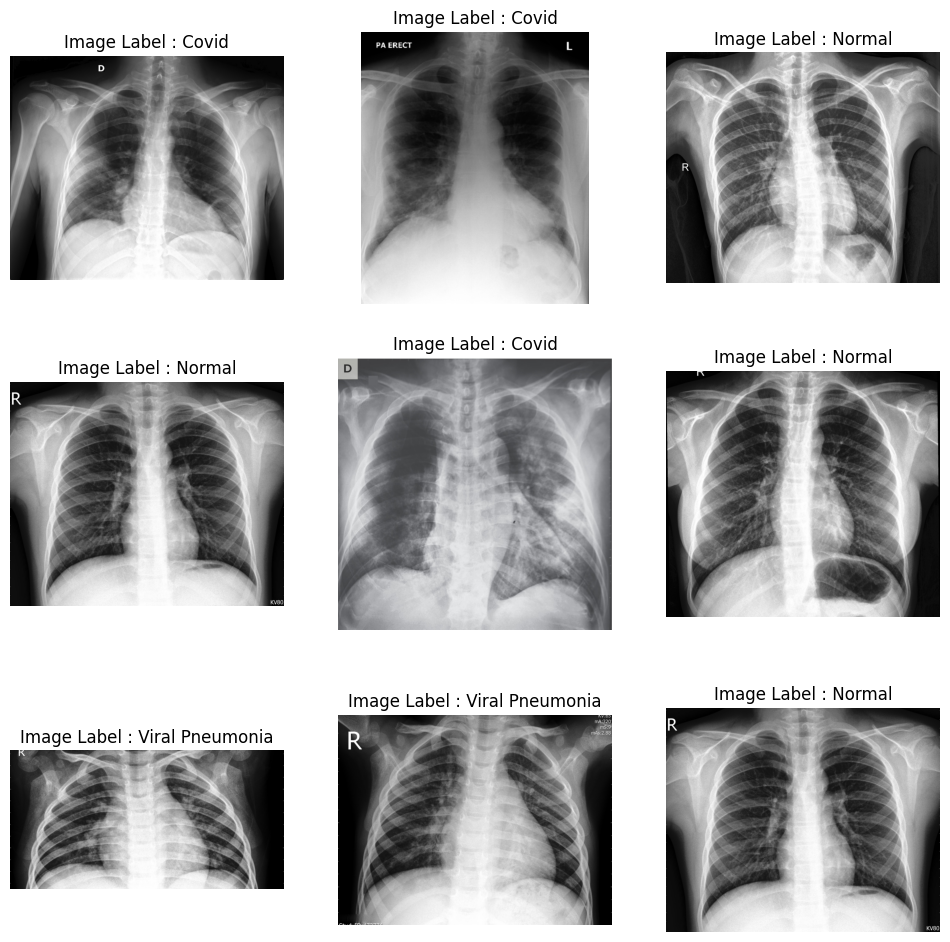

In [ ]:
plt.figure(figsize=(12, 12))
rows = 3
cols = 3

for i in range(1, 10, 1):
  random_image = random.choice(image_path_list)
  image_label = random_image.parent.stem
  img = Image.open(random_image)
  img_as_array = np.asarray(img)
  plt.subplot(rows, cols, i)
  plt.imshow(img_as_array)
  plt.title(f"Image Label : {image_label}")
  plt.axis(False)

In [ ]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((200, 200)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=transform)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=transform)

In [ ]:
print(len(train_data)),
print(len(test_data)),
print(train_data[0]),
print("This is Label and Above is Image Tensor")

251
66
(tensor([[[-0.9373, -0.9451, -0.9529,  ..., -0.9451, -0.9373, -0.9059],
         [-0.9451, -0.9608, -0.9686,  ..., -0.9608, -0.9451, -0.9294],
         [-0.9529, -0.9765, -0.9843,  ..., -0.9686, -0.9529, -0.9373],
         ...,
         [-0.9765, -0.9922, -0.9922,  ..., -0.9608, -0.9608, -0.9529],
         [-0.9922, -0.9843, -0.9922,  ..., -0.9529, -0.9529, -0.9451],
         [-1.0000, -0.9922, -0.9922,  ..., -0.9451, -0.9451, -0.9373]],

        [[-0.9373, -0.9451, -0.9529,  ..., -0.9451, -0.9373, -0.9059],
         [-0.9451, -0.9608, -0.9686,  ..., -0.9608, -0.9451, -0.9294],
         [-0.9529, -0.9765, -0.9843,  ..., -0.9686, -0.9529, -0.9373],
         ...,
         [-0.9765, -0.9922, -0.9922,  ..., -0.9608, -0.9608, -0.9529],
         [-0.9922, -0.9843, -0.9922,  ..., -0.9529, -0.9529, -0.9451],
         [-1.0000, -0.9922, -0.9922,  ..., -0.9451, -0.9451, -0.9373]],

        [[-0.9373, -0.9451, -0.9529,  ..., -0.9451, -0.9373, -0.9059],
         [-0.9451, -0.9608, -0.9686, 

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,
                              batch_size=16,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                             batch_size=16,
                             shuffle=True)

In [ ]:
class_names = train_data.classes
class_names

['Covid', 'Normal', 'Viral Pneumonia']

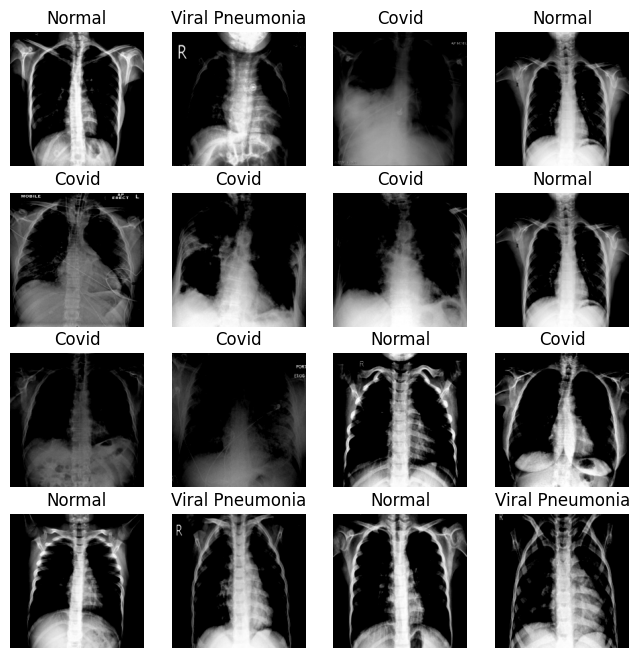

In [ ]:
from PIL import Image
plt.figure(figsize=(8, 8))
rows = 4
cols = 4
i = 0
for batch,(X, y) in enumerate(train_dataloader):
  if(batch==1):
    break
  else:
    for j in range(X.shape[0]):
        i+=1
        img = X[j].permute(1, 2, 0)
        label = y[j]
        plt.subplot(rows, cols, i)
        plt.imshow(img, cmap='gray')
        plt.title(class_names[label])
        plt.axis(False)

In [ ]:
#Creating Model

In [ ]:
class Covid_detection(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(3, 16, 3, 1, 1),
        nn.ReLU(),
        nn.Conv2d(16, 16, 3, 1, 1),
        nn.ReLU(),
        nn.Conv2d(16, 16, 3, 1, 1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(16, 16, 3, 1, 1),
        nn.ReLU(),
        nn.Conv2d(16, 16, 3, 1, 1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(16*25*100, 3)
    )

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    x =self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)

model_0 = Covid_detection()
model_0.load_state_dict(torch.load(f="models/COVID_DETECTION.pth"))
model_0.to(device)

<ipython-input-186-bc70cb30d943>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_0.load_state_dict(torch.load(f="models/COVID_DETECTION.pth"))


Covid_detection(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=40000, out_features=3, bias=True)
  )
)

In [ ]:
model_0.eval()
with torch.inference_mode():
  img_t, label_t = next(iter(test_dataloader))
  pred_logits = model_0(img_t)
pred_label_t = torch.argmax(torch.softmax(pred_logits, dim=1), dim=1)
print(label_t)
print(pred_label_t)

tensor([1, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1])
tensor([1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1])


In [ ]:
#Loss Function....

# loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.0001, momentum=0.8)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
# from timeit import default_timer as timer

# epochs = 10
# start_time = timer()
# for epoch in range(epochs):
#   print(f"Epoch : {epoch}")
#   train_loss, train_acc = 0, 0
#   print("Training Phase")
#   for batch, (X, y) in enumerate(train_dataloader):
#     X, y = X.to(device), y.to(device)
#     model_0.train()

#     train_logits = model_0(X)
#     train_pred = torch.argmax(torch.softmax(train_logits, 1), 1)

#     batch_loss = loss_fn(train_logits, y)
#     train_loss += batch_loss
#     train_acc += accuracy_fn(y, train_pred)

#     optimizer.zero_grad()
#     batch_loss.backward()
#     optimizer.step()

#     # if (batch%5)==0:
#     #   print(f"Batch : {batch}")
#     #   print("----------------")

#   train_loss /= len(train_dataloader)
#   train_acc /= len(train_dataloader)

#   print("===============")
#   print("Testing Phase")
#   model_0.eval()
#   with torch.inference_mode():
#     test_loss, test_acc = 0, 0
#     for batch, (X, y) in enumerate(test_dataloader):
#       X.to(device), y.to(device)

#       test_logits = model_0(X)
#       test_pred = torch.argmax(torch.softmax(test_logits, 1), 1)

#       test_loss += loss_fn(test_logits, y)
#       test_acc += accuracy_fn(test_pred, y)

#       # if (batch%2)==0:
#       #   print(f"Batch : {batch}")
#       #   print("----------------")

#     test_loss /= len(test_dataloader)
#     test_acc /= len(test_dataloader)

#   if (epoch%5)==0:
#     print(f"Train Loss : {train_loss:.3f} | Train Acc : {train_acc:.2f}")
#     print(f"Test Loss : {test_loss:.3f} | Test Acc : {test_acc:.2f}")

# end_time = timer()

# total_time = end_time-start_time
# print(f"Total Time Required to train on {device} is {total_time:.3f}")

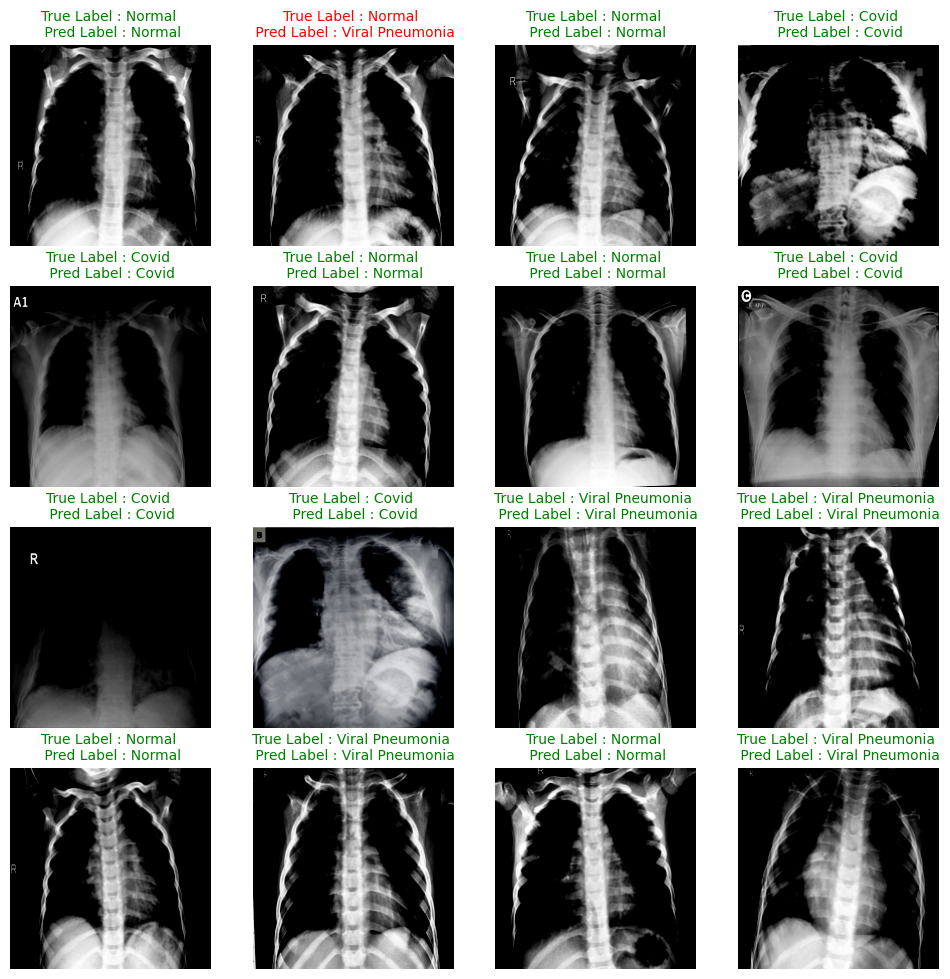

In [ ]:
plt.figure(figsize=(12, 12))
rows = 4
cols = 4
i = 0
for batch,(X, y) in enumerate(test_dataloader):
  if(batch==1):
    break
  else:
    for j in range(X.shape[0]):
        i+=1
        img = X[j].permute(1, 2, 0)
        label = y[j]
        model_0.eval()
        with torch.inference_mode():
          pred_logits = model_0(X)
        pred_label = torch.argmax(torch.softmax(pred_logits, dim=1), dim=1)
        plt.subplot(rows, cols, i)
        plt.imshow(img, cmap='gray')

        if (label==pred_label[j]):
          plt.title(f"True Label : {class_names[label]} \n Pred Label : {class_names[pred_label[j]]}", color='green', fontdict={'fontsize':10})
        else:
          plt.title(f"True Label : {class_names[label]} \n Pred Label : {class_names[pred_label[j]]}", color='red', fontdict={'fontsize':10})
        plt.axis(False)

In [ ]:
#Saving State Dict

In [ ]:
# from pathlib import Path

# MODEL_PATH = Path("models")
# MODEL_PATH.mkdir(parents=True,
#                  exist_ok=True)

# MODEL_NAME = "COVID_DETECTION.pth"
# MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# print(f"Model is in Directory {MODEL_SAVE_PATH}")

# torch.save(obj=model_0.state_dict(),
#            f=MODEL_SAVE_PATH)

Model is in Directory models/COVID_DETECTION.pth


In [ ]:
'''My First Custom Built 95% Accuracy Model'''

'My First Custom Built 95% Accuracy Model'